In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SepsisDataset/CombinedGEOCohorts/Cohort1_GSE33341_GSE54514.csv')
df


,database,GEO Cohort,title,accession,type,source,organism,Gender,Age (yr),pathogen,infection status,Survival Status,Tissue,Endotype cohort,Remarks
0,GEO,GSE33341,blood patient with E. coli bacteremia [CS101-D...,GSM824707,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,43.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,No Info,Infection status and Survival status were left...
1,GEO,GSE33341,blood patient with E. coli bacteremia [D887.2....,GSM824708,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,49.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,NaN,Infection status and Survival status were left...
2,GEO,GSE33341,blood patient with E. coli bacteremia [CSD5036...,GSM824709,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,44.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,NaN,Infection status and Survival status were left...
3,GEO,GSE33341,blood patient with E. coli bacteremia [CSD2575...,GSM824710,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,70.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,NaN,Infection status and Survival status were left...
4,GEO,GSE33341,blood patient with E. coli bacteremia [D2341.CEL],GSM824711,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Male,40.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,NaN,Infection status and Survival status were left...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=14",GSM1318054,RNA,"PAXgene whole blood, Control, Day 5, ID=14",Homo sapiens,M,24.0,Bacterial,healthy,Control,NaN,No Info,NaN
253,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=15",GSM1318055,RNA,"PAXgene whole blood, Control, Day 5, ID=15",Homo sapiens,F,25.0,Bacterial,healthy,Control,NaN,No Info,NaN
254,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=16",GSM1318056,RNA,"PAXgene whole blood, Control, Day 5, ID=16",Homo sapiens,F,24.0,Bacterial,healthy,Control,NaN,No Info,NaN
255,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=17",GSM1318057,RNA,"PAXgene whole blood, Control, Day 5, ID=17",Homo sapiens,F,27.0,Bacterial,healthy,Control,NaN,No Info,NaN


In [ ]:
for col in df.columns:
    print(col)

database
GEO Cohort
title
accession
type
source
organism
Gender
Age (yr)
pathogen
infection status
Survival Status
Tissue
Endotype cohort
Remarks


# **Data Cleaning**

In [ ]:
df1= df.drop(columns=['Endotype cohort',	'Remarks'])

df1=df1.dropna(how='all')
df1

,database,GEO Cohort,title,accession,type,source,organism,Gender,Age (yr),pathogen,infection status,Survival Status,Tissue
0,GEO,GSE33341,blood patient with E. coli bacteremia [CS101-D...,GSM824707,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,43.0,Escherichia coli,INFECTED,Sepsis Infected,NaN
1,GEO,GSE33341,blood patient with E. coli bacteremia [D887.2....,GSM824708,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,49.0,Escherichia coli,INFECTED,Sepsis Infected,NaN
2,GEO,GSE33341,blood patient with E. coli bacteremia [CSD5036...,GSM824709,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,44.0,Escherichia coli,INFECTED,Sepsis Infected,NaN
3,GEO,GSE33341,blood patient with E. coli bacteremia [CSD2575...,GSM824710,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,70.0,Escherichia coli,INFECTED,Sepsis Infected,NaN
4,GEO,GSE33341,blood patient with E. coli bacteremia [D2341.CEL],GSM824711,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Male,40.0,Escherichia coli,INFECTED,Sepsis Infected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=14",GSM1318054,RNA,"PAXgene whole blood, Control, Day 5, ID=14",Homo sapiens,M,24.0,Bacterial,healthy,Control,NaN
253,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=15",GSM1318055,RNA,"PAXgene whole blood, Control, Day 5, ID=15",Homo sapiens,F,25.0,Bacterial,healthy,Control,NaN
254,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=16",GSM1318056,RNA,"PAXgene whole blood, Control, Day 5, ID=16",Homo sapiens,F,24.0,Bacterial,healthy,Control,NaN
255,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=17",GSM1318057,RNA,"PAXgene whole blood, Control, Day 5, ID=17",Homo sapiens,F,27.0,Bacterial,healthy,Control,NaN


In [ ]:
df1.loc [(df1['Gender'] == 'F') , 'gender']= 'Female'
df1.loc [(df1['Gender'] == 'M') , 'gender']= 'Male'
df1.loc [(df1['Gender'] == 'Female') , 'gender']= 'Female'
df1.loc [(df1['Gender'] == 'Male') , 'gender']= 'Male'

df1.loc [(df1['Age (yr)']>= 18) & (df1['Age (yr)']<= 35) , 'Age']= 'Young'
df1.loc [(df1['Age (yr)']>= 36) & (df1['Age (yr)']<= 64) , 'Age']= 'Middle'
df1.loc [(df1['Age (yr)']>= 65) , 'Age']= 'Elderly'
df1

,database,GEO Cohort,title,accession,type,source,organism,Gender,Age (yr),pathogen,infection status,Survival Status,Tissue,gender,Age
0,GEO,GSE33341,blood patient with E. coli bacteremia [CS101-D...,GSM824707,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,43.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,Female,Middle
1,GEO,GSE33341,blood patient with E. coli bacteremia [D887.2....,GSM824708,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,49.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,Female,Middle
2,GEO,GSE33341,blood patient with E. coli bacteremia [CSD5036...,GSM824709,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,44.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,Female,Middle
3,GEO,GSE33341,blood patient with E. coli bacteremia [CSD2575...,GSM824710,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Female,70.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,Female,Elderly
4,GEO,GSE33341,blood patient with E. coli bacteremia [D2341.CEL],GSM824711,RNA,blood patient with E. coli bacteremia prior an...,Homo sapiens,Male,40.0,Escherichia coli,INFECTED,Sepsis Infected,NaN,Male,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=14",GSM1318054,RNA,"PAXgene whole blood, Control, Day 5, ID=14",Homo sapiens,M,24.0,Bacterial,healthy,Control,NaN,Male,Young
253,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=15",GSM1318055,RNA,"PAXgene whole blood, Control, Day 5, ID=15",Homo sapiens,F,25.0,Bacterial,healthy,Control,NaN,Female,Young
254,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=16",GSM1318056,RNA,"PAXgene whole blood, Control, Day 5, ID=16",Homo sapiens,F,24.0,Bacterial,healthy,Control,NaN,Female,Young
255,GEO,GSE54514,"PAXgene whole blood, Control, Day_5, ID=17",GSM1318057,RNA,"PAXgene whole blood, Control, Day 5, ID=17",Homo sapiens,F,27.0,Bacterial,healthy,Control,NaN,Female,Young


# **Data Visualization**




In [ ]:
df2 = df1.groupby(['gender', 'Survival Status']).size().reset_index()
df2= df2.rename(columns={0:'Survival status Count'})
df2

,gender,Survival Status,Survival status Count
0,Female,Control,45
1,Female,Sepsis Infected,20
2,Female,sepsis nonsurvivor,18
3,Female,sepsis survivor,57
4,Male,Control,34
5,Male,Sepsis Infected,31
6,Male,sepsis nonsurvivor,13
7,Male,sepsis survivor,39


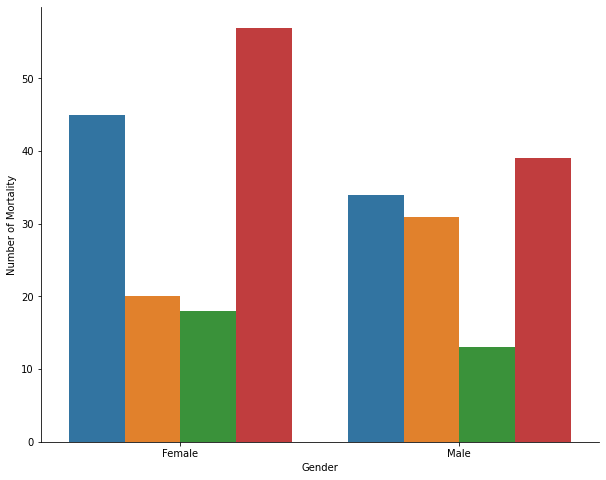

In [ ]:
plt.figure(figsize=(10,8))
axes1=sns.barplot(data=df2,x='gender',y='Survival status Count', hue='Survival Status')
axes1.set(xlabel='Gender', ylabel='Number of Mortality')
leg = plt.legend()
axes1.get_legend().remove()

sns.despine()

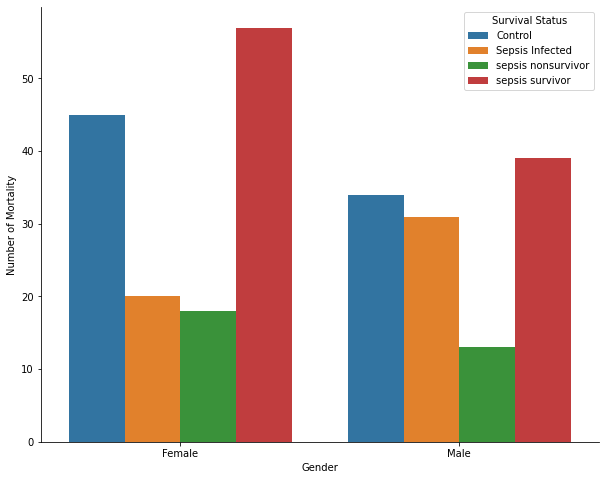

In [ ]:
plt.figure(figsize=(10,8))
axes1=sns.barplot(data=df2,x='gender',y='Survival status Count', hue='Survival Status')
axes1.set(xlabel='Gender', ylabel='Number of Mortality')

sns.despine()

In [ ]:
df3 = df1.groupby(['Survival Status', 'gender']).size().reset_index()
df3= df3.rename(columns={0:'Gender Count'})
df3

,Survival Status,gender,Gender Count
0,Control,Female,45
1,Control,Male,34
2,Sepsis Infected,Female,20
3,Sepsis Infected,Male,31
4,sepsis nonsurvivor,Female,18
5,sepsis nonsurvivor,Male,13
6,sepsis survivor,Female,57
7,sepsis survivor,Male,39


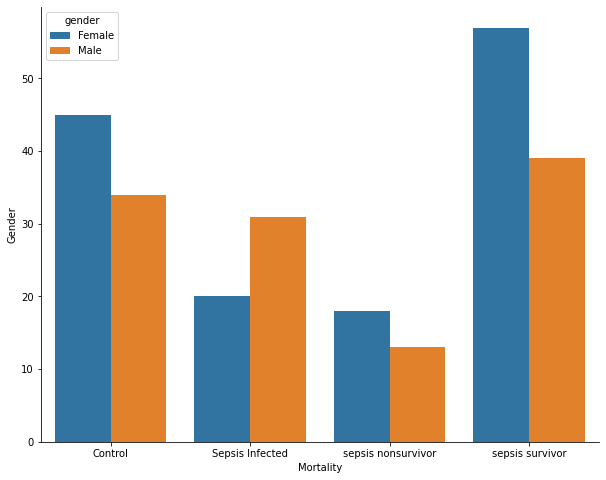

In [ ]:
plt.figure(figsize=(10,8))
axes2=sns.barplot(data=df3,x='Survival Status',y='Gender Count', hue='gender')
axes2.set(xlabel='Mortality', ylabel='Gender')
sns.despine()

In [ ]:
df3 = df1.groupby(['Survival Status', 'Age (yr)']).size().reset_index()
df3= df3.rename(columns={0:'Age Count'})
df3

,Survival Status,Age (yr),Age Count
0,Control,23.0,3
1,Control,24.0,18
2,Control,25.0,8
3,Control,26.0,7
4,Control,27.0,4
...,...,...,...
83,sepsis survivor,73.0,3
84,sepsis survivor,75.0,5
85,sepsis survivor,81.0,5
86,sepsis survivor,83.0,3


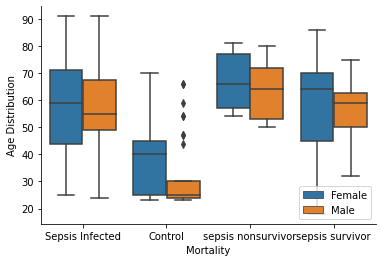

In [ ]:

axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='gender')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
plt.legend(loc='lower right')
sns.despine()

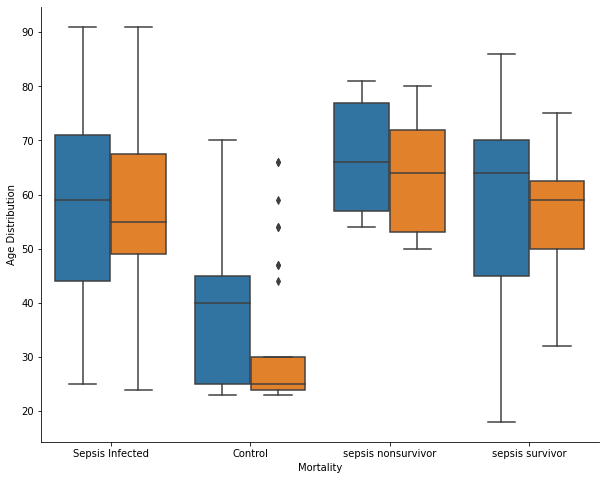

In [ ]:
plt.figure(figsize=(10,8))
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='gender')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
sns.despine()
leg = plt.legend()
axes3.get_legend().remove()
plt.show()

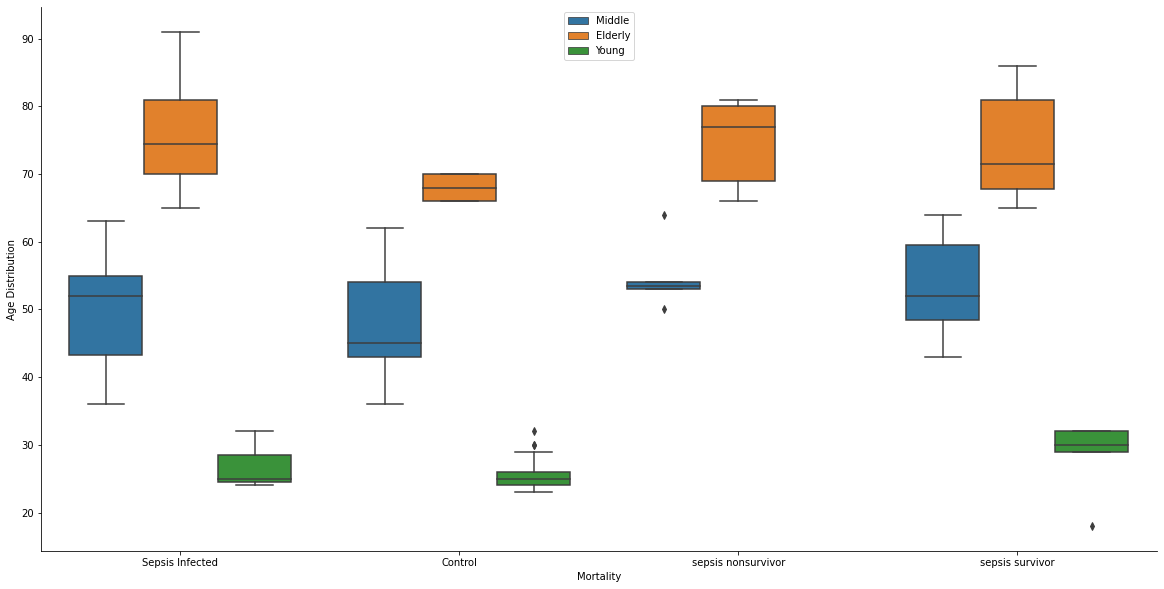

In [ ]:
plt.figure(figsize=(20,10))
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='Age')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
plt.legend(loc='upper center')
sns.despine()

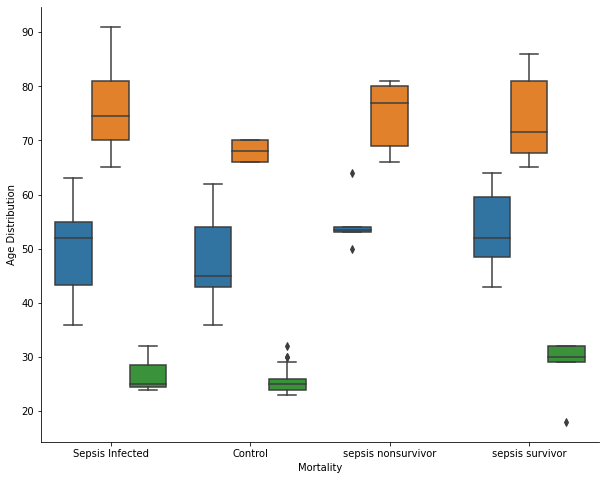

In [ ]:
plt.figure(figsize=(10,8))
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='Age')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
leg = plt.legend()
axes3.get_legend().remove()
sns.despine()

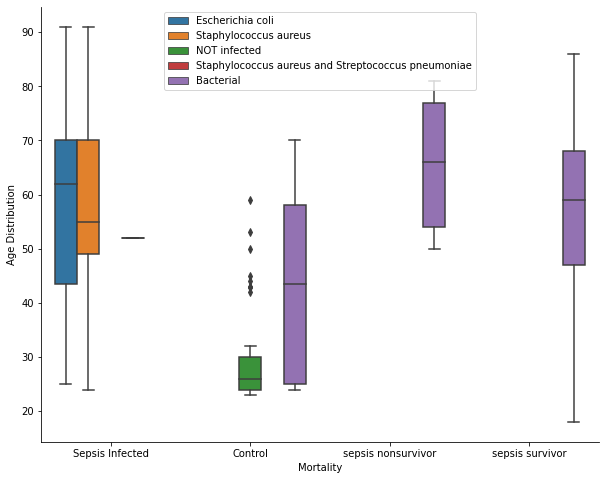

In [ ]:
plt.figure(figsize=(10,8))
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='pathogen')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')
plt.legend(loc='upper center')
sns.despine()

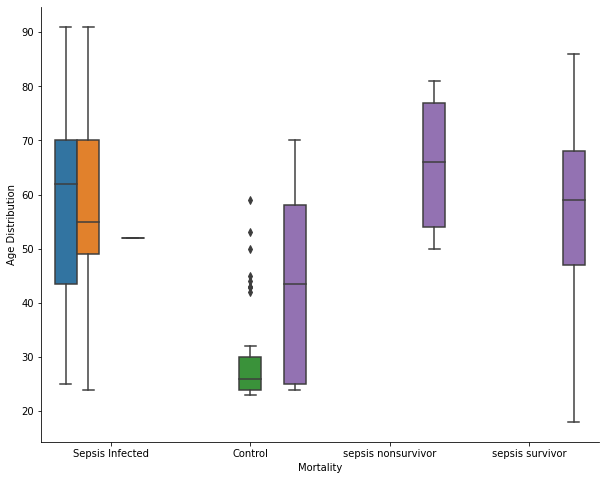

In [ ]:
plt.figure(figsize=(10,8))
axes3=sns.boxplot(data=df1,x='Survival Status',y='Age (yr)', hue='pathogen')
axes3.set(xlabel='Mortality', ylabel='Age Distribution')

leg = plt.legend()
 
axes3.get_legend().remove()
 
sns.despine()

[Text(0, 0.5, 'Pathogen Count'), Text(0.5, 0, 'Mortality')]

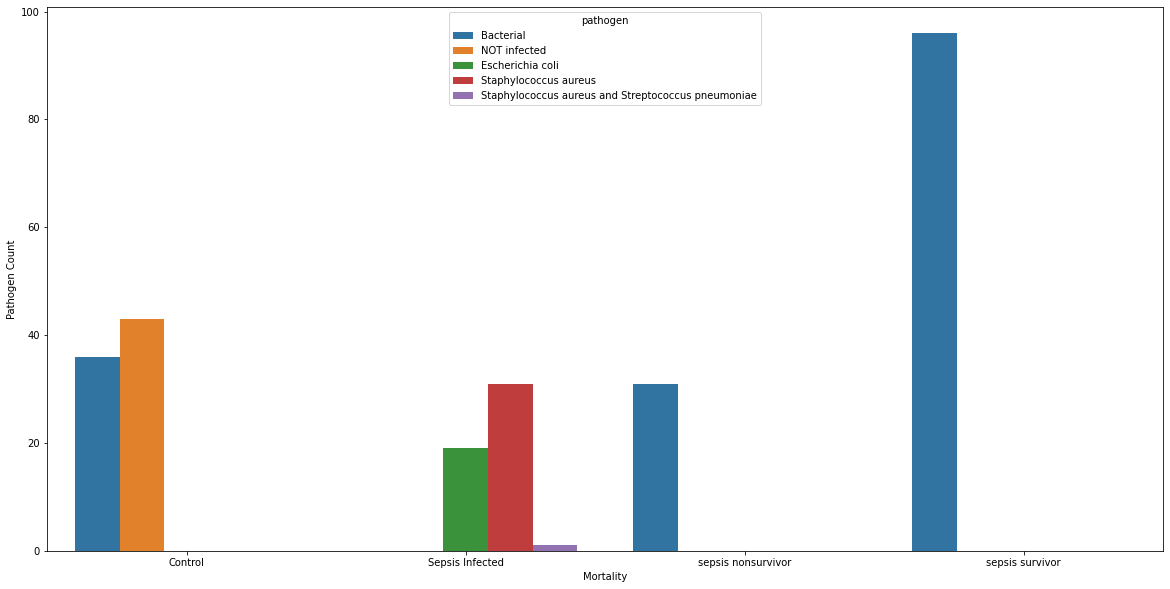

In [ ]:
plt.figure(figsize=(20,10))
df5 = df1.groupby(['Survival Status', 'pathogen']).size().reset_index()
df5= df5.rename(columns={0:'Pathogen Count'})
df5

axes4=sns.barplot(data=df5,x='Survival Status',y='Pathogen Count', hue='pathogen')
axes4.set(xlabel='Mortality', ylabel='Pathogen Count')



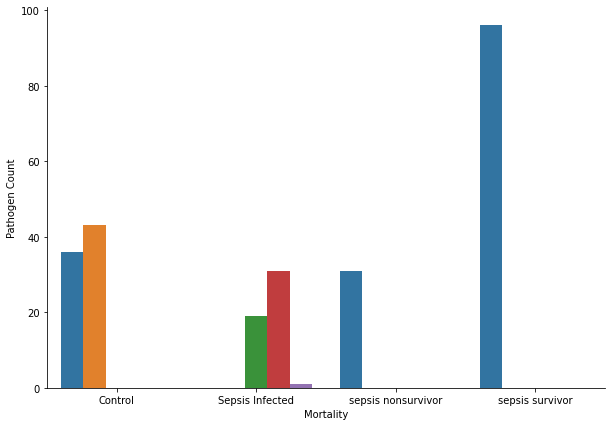

In [ ]:
plt.figure(figsize=(10,7))
import matplotlib.pyplot as plt
df5 = df1.groupby(['Survival Status', 'pathogen']).size().reset_index()
df5= df5.rename(columns={0:'Pathogen Count'})
df5

axes4=sns.barplot(data=df5,x='Survival Status',y='Pathogen Count', hue='pathogen')
axes4.set(xlabel='Mortality', ylabel='Pathogen Count')
leg = plt.legend()
 
axes4.get_legend().remove()


sns.despine()
